In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = "E:\Project\Loker ASN 2023\Loker ASN 2023 Clean.csv"
df = pd.read_csv(data, index_col=0)

In [15]:
df.head()

,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOMATIKA,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III PERTANAHAN,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III TEKNIK GEODESI,2647200,5147200,19
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOGRAFI,2647200,5147200,19


Exploratory Data Analysis

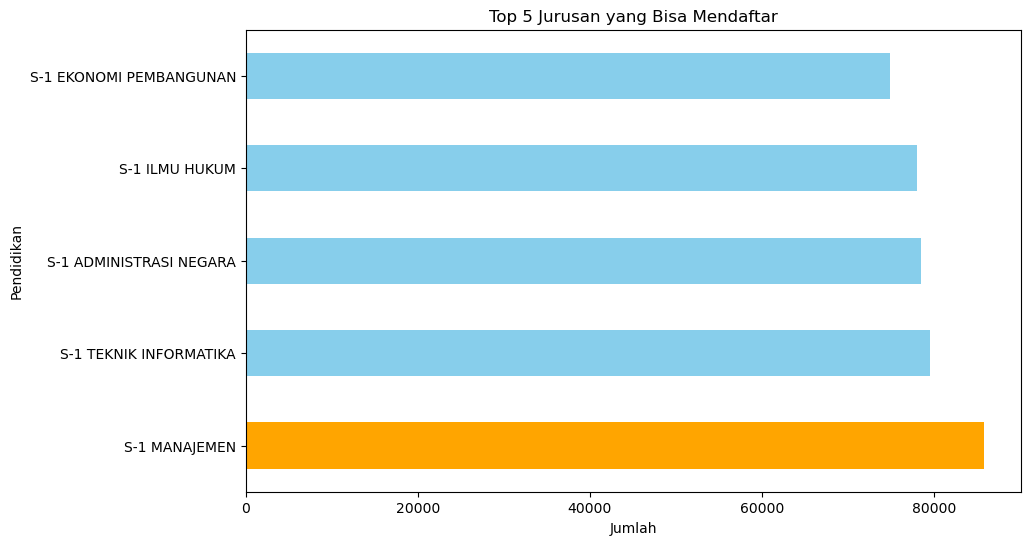

In [43]:
# Menghitung jumlah kemunculan setiap 'pendidikan_nm' dan mengurutkannya secara descending
top_pendidikan = df['pendidikan_nm'].value_counts().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(
    figsize=(10, 6))
top_pendidikan.plot(kind='barh', color=['skyblue' if x != top_pendidikan.idxmax() else 'orange' for x in top_pendidikan.index])
plt.title('Top 5 Jurusan yang Bisa Mendaftar')
plt.xlabel('Jumlah')
plt.ylabel('Pendidikan')
plt.show()

In [44]:
df.describe()

,gaji_min,gaji_max,jumlah_formasi
count,1.490580e+07,1.490580e+07,1.490580e+07
mean,3.811449e+06,7.289798e+06,7.652036e+00
std,1.396316e+06,2.152138e+06,1.690283e+01
min,1.000000e+06,1.000000e+06,1.000000e+00
25%,2.966500e+06,5.466500e+06,1.000000e+00
50%,3.506500e+06,6.966500e+06,1.000000e+00
75%,3.506500e+06,9.329380e+06,5.000000e+00
max,1.485192e+07,4.166500e+07,1.746000e+03


In [27]:
# Melihat instansi dengan tawaran gaji terendah
gaji_terendah = df['gaji_min'].min()

# Menggunakan groupby dan mengambil baris pertama dari setiap kelompok
ins_gaji_terendah = df[df['gaji_min'] == gaji_terendah].groupby('ins_nm').first()[['gaji_min','gaji_max']]

# Menampilkan instansi dengan gaji terendah, satu baris per instansi
print(ins_gaji_terendah)

                                 gaji_min  gaji_max
ins_nm                                             
Pemerintah Kab. Halmahera Timur   1000000   1000000
Pemerintah Kab. Sumbawa           1000000   3000000


In [28]:
# Melihat instansi dengan tawaran gaji tertinggi
gaji_tertinggi = df['gaji_max'].max()
ins_gaji_tertinggi = df[df['gaji_max'] == gaji_tertinggi].groupby('ins_nm').first()[['gaji_min','gaji_max']]
print(ins_gaji_tertinggi)

                           gaji_min  gaji_max
ins_nm                                       
Pemerintah Kab. Bengkalis   2966500  41665000


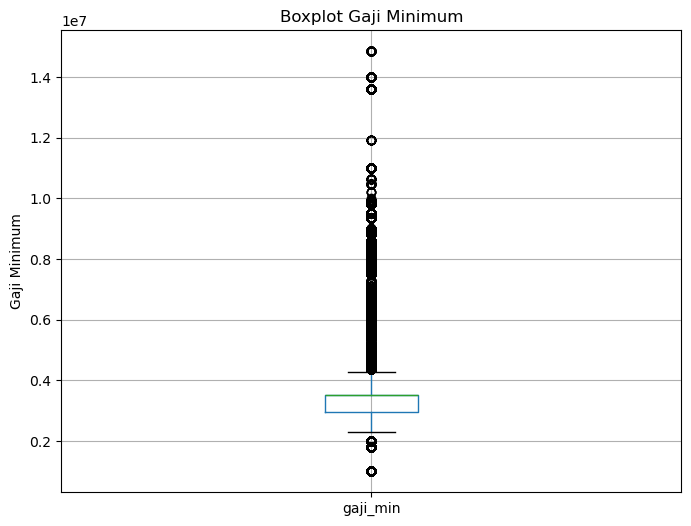

In [19]:
# Membuat boxplot dari kolom 'gaji_min'
plt.figure(figsize=(8, 6))
df.boxplot(column='gaji_min')
plt.title('Boxplot Gaji Minimum')
plt.ylabel('Gaji Minimum')
plt.show()

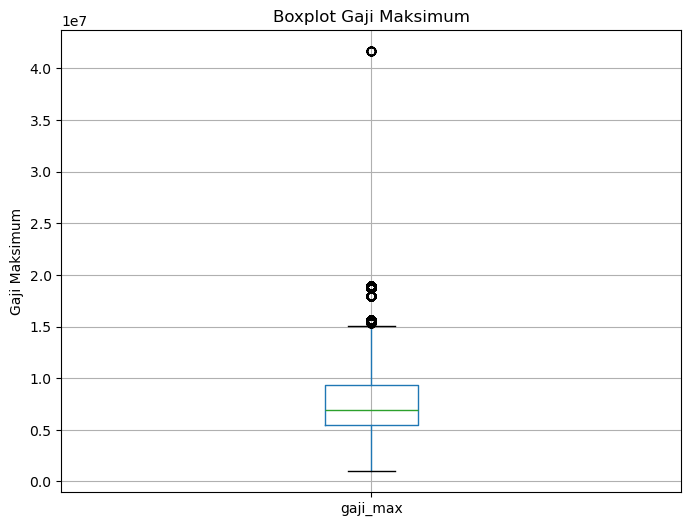

In [20]:
# Membuat boxplot dari kolom 'gaji_max'
plt.figure(figsize=(8, 6))
df.boxplot(column='gaji_max')
plt.title('Boxplot Gaji Maksimum')
plt.ylabel('Gaji Maksimum')
plt.show()

In [50]:
df_new = df.reset_index(drop=False)

In [51]:
df_new.head()

,index,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
0,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
1,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOMATIKA,2647200,5147200,19
2,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III PERTANAHAN,2647200,5147200,19
3,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III TEKNIK GEODESI,2647200,5147200,19
4,0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,D-III GEOGRAFI,2647200,5147200,19


In [56]:
# Menghilangkan duplikat berdasarkan index
df_unique_index = df.reset_index().drop_duplicates(subset='index').set_index('index')

# Menampilkan DataFrame setelah menghilangkan duplikat
df_unique_index.head()

,ins_nm,jp_nama,formasi_nm,jabatan_nm,lokasi_nm,pendidikan_nm,gaji_min,gaji_max,jumlah_formasi
index,,,,,,,,,
0,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - SULAWESI TENGGARA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,19
1,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - ACEH,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,15
2,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - LAMPUNG,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12
3,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - NUSA TENGGARA TIMUR,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12
4,Kementerian Agraria dan Tata Ruang/Badan Perta...,PPPK Teknis,KHUSUS,TERAMPIL - ASISTEN PENATA KADASTRAL,KEMENTERIAN ATR/BPN - PAPUA,"D-III SURVEI, PENGUKURAN, PEMETAAN",2647200,5147200,12


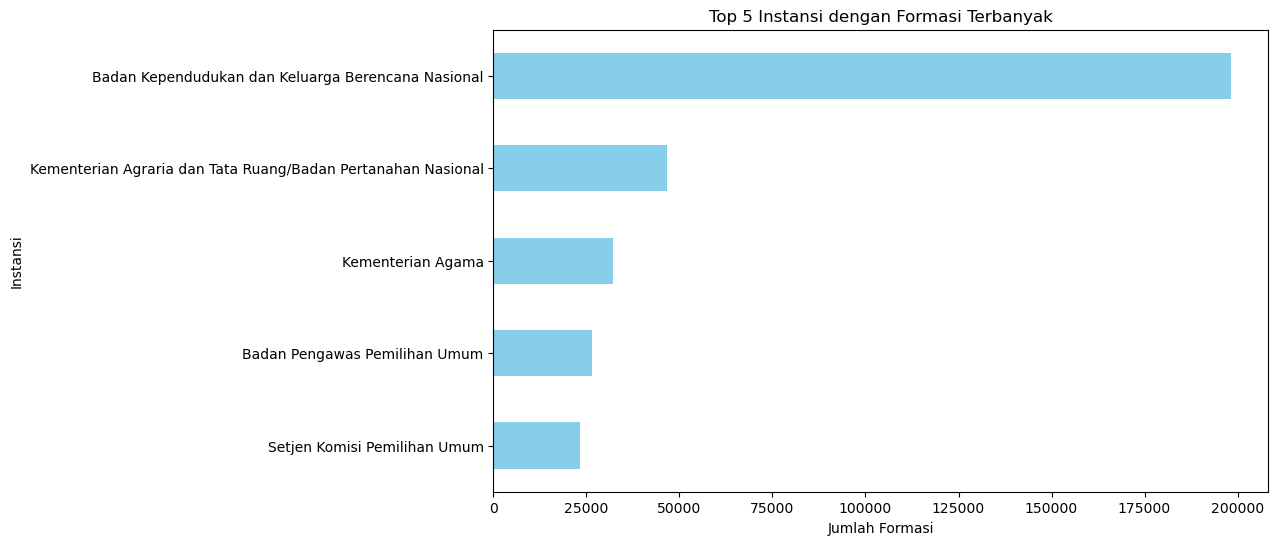

In [65]:
# Menghitung jumlah formasi untuk setiap instansi
top_instansi = df_unique_index.groupby('ins_nm')['jumlah_formasi'].sum().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(figsize=(10, 6))
top_instansi.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Instansi dengan Formasi Terbanyak')
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.show()

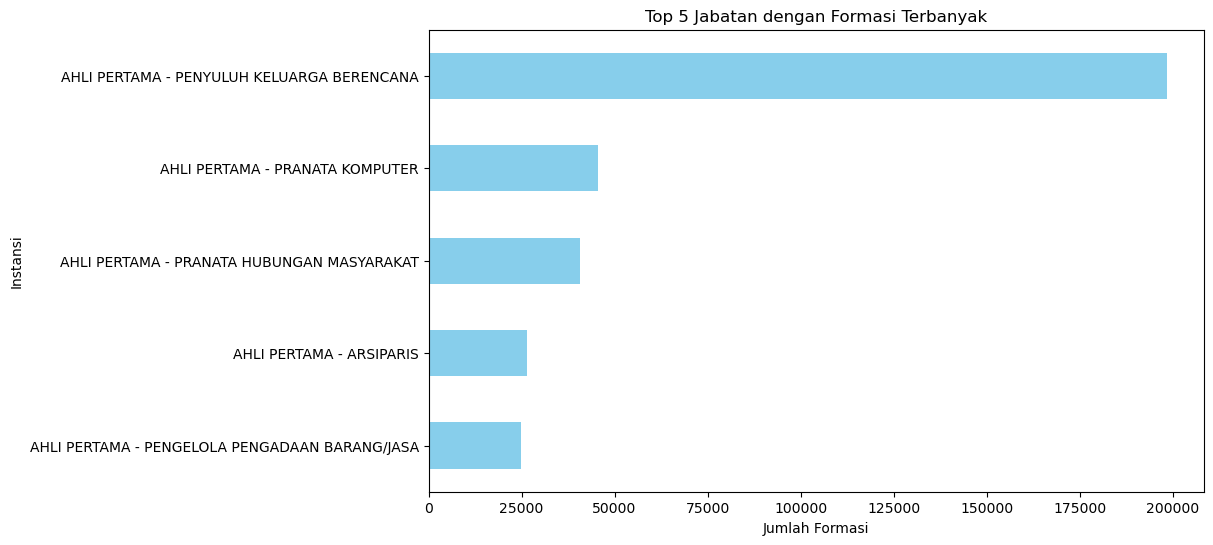

In [66]:
# Menghitung jumlah formasi untuk setiap instansi
top_instansi = df_unique_index.groupby('jabatan_nm')['jumlah_formasi'].sum().sort_values(ascending=False).head(5)

# Membuat grafik bar chart horizontal
plt.figure(figsize=(10, 6))
top_instansi.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 5 Jabatan dengan Formasi Terbanyak')
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.show()